**Useful resources to understand XML structure**

Intro to XML: https://www.w3schools.com/xml/xml_tree.asp



https://researchbasics.education.uconn.edu/t-test/#

https://researchbasics.education.uconn.edu/normal-distribution/

**--------------------------------- IMPORTING PACKAGES --------------------------------------**

In [9]:
import requests                               #makes data from URLs easy to gather
import xml.etree.ElementTree as ET            #stores hierarchical structures from XML
import csv
import pandas as pd
from IPython.display import display, HTML
import nltk                                   #natural language toolkit; helpful for string data
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS    #visualizing word in cloud
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm as cm               #correlation map
#from pydoc import help
from scipy.stats.stats import pearsonr        #pearson correlation
from scipy.stats import ttest_ind
from collections import Counter
from scipy import stats

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mariam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**--------------------------------- READING INTO XML FILE --------------------------------------**

**Converting XML to pandas dataframe to be able to manipulate data.**


In [2]:
#PARSING THROUGH XML FILE

"""


#no output achieved; parsing through file saved on machine
#code from Shreya

tree = ET.parse('../Desktop/Data/plant_catalog.xml')
root = tree.getroot()
#for child in root:
#    print child.tag, child.attrib, child.text

#print root.tag
#print root.attrib

dict_to_df = {}
for neighbor in root.findall('PLANT/PLANT'):
    print neighbor.tag, neighbor.attrib
    for child in neighbor:
       # print child.tag, child.attrib, child.text
        if (child.tag not in dict_to_df):
            dict_to_df[child.tag]=[child.text]
        else:
            dict_to_df[child.tag].append(child.text)
        print dict_to_df
for key, array in dict_to_df.items():
    print key,len(array)
    
"""

#obtained most code from http://www.austintaylor.io/lxml/python/pandas/xml/dataframe/2016/07/08/convert-xml-to-pandas-dataframe/

# another dataset: user_agent_url = 'https://www.w3schools.com/xml/simple.xml'
user_agent_url = 'https://www.w3schools.com/xml/plant_catalog.xml'
xml_data = requests.get(user_agent_url).content

class XML2DataFrame:

    def __init__(self, xml_data):                    #reading into file
        self.root = ET.XML(xml_data)

        
    
    def parse_root(self, root):                      #list of dictionaries and attributes of the children under this XML root.           
        return [self.parse_element(child) for child in iter(root)]

    
    def parse_element(self, element, parsed=None):   #Collect {key:attribute} and {tag:text} from XML elements and all children into a single dictionary of strings.
        if parsed is None:
            parsed = dict()
        for key in element.keys():
            parsed[key] = element.attrib.get(key)
        if element.text:
            parsed[element.tag] = element.text
        
        for child in list(element):                  #apply recursion
            self.parse_element(child, parsed)
        return parsed

    def process_data(self):                          #Initiate the root XML, parse it, and return a dataframe
        structure_data = self.parse_root(self.root)
        return pd.DataFrame(structure_data)

xml2df = XML2DataFrame(xml_data)
xml_df = xml2df.process_data()
del xml_df['PLANT']                                  #removed "PLANT" column since just a divider
display(HTML(xml_df.to_html()))



,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
0,031599,Sanguinaria canadensis,Bloodroot,Mostly Shady,$2.44,4
1,030699,Aquilegia canadensis,Columbine,Mostly Shady,$9.37,3
2,051799,Caltha palustris,Marsh Marigold,Mostly Sunny,$6.81,4
3,030699,Caltha palustris,Cowslip,Mostly Shady,$9.90,4
4,012099,Dicentra cucullaria,Dutchman's-Breeches,Mostly Shady,$6.44,3
5,041899,Asarum canadense,"Ginger, Wild",Mostly Shady,$9.03,3
6,012699,Hepatica americana,Hepatica,Mostly Shady,$4.45,4
7,010299,Hepatica americana,Liverleaf,Mostly Shady,$3.99,4
8,020199,Arisaema triphyllum,Jack-In-The-Pulpit,Mostly Shady,$3.23,4
9,060599,Podophyllum peltatum,Mayapple,Mostly Shady,$2.98,3


**--------------------------------- EXTRACTING BASIC DATA FROM XML FILE --------------------------------------**


In [3]:
xml_df.nunique()

AVAILABILITY    32
BOTANICAL       25
COMMON          36
LIGHT            6
PRICE           36
ZONE             8
dtype: int64

In [4]:
xml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
AVAILABILITY    36 non-null object
BOTANICAL       36 non-null object
COMMON          36 non-null object
LIGHT           36 non-null object
PRICE           36 non-null object
ZONE            36 non-null object
dtypes: object(6)
memory usage: 1.8+ KB


In [5]:
group = xml_df.groupby(["LIGHT"])
for key,item in group:
    display(HTML(group.get_group(key).to_html()))

,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
0,031599,Sanguinaria canadensis,Bloodroot,Mostly Shady,$2.44,4
1,030699,Aquilegia canadensis,Columbine,Mostly Shady,$9.37,3
3,030699,Caltha palustris,Cowslip,Mostly Shady,$9.90,4
4,012099,Dicentra cucullaria,Dutchman's-Breeches,Mostly Shady,$6.44,3
5,041899,Asarum canadense,"Ginger, Wild",Mostly Shady,$9.03,3
6,012699,Hepatica americana,Hepatica,Mostly Shady,$4.45,4
7,010299,Hepatica americana,Liverleaf,Mostly Shady,$3.99,4
8,020199,Arisaema triphyllum,Jack-In-The-Pulpit,Mostly Shady,$3.23,4
9,060599,Podophyllum peltatum,Mayapple,Mostly Shady,$2.98,3
12,020199,Claytonia Virginica,Spring-Beauty,Mostly Shady,$6.59,7


,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
2,051799,Caltha palustris,Marsh Marigold,Mostly Sunny,$6.81,4


,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
15,020199,Erythronium americanum,"Violet, Dog-Tooth",Shade,$9.04,4
16,032499,Erythronium americanum,Trout Lily,Shade,$6.94,4
17,041399,Erythronium americanum,Adder's-Tongue,Shade,$9.58,4
20,050399,Monarda didyma,Bee Balm,Shade,$4.59,4
21,042799,Monarda didyma,Bergamot,Shade,$7.16,4
23,061099,Ranunculus,Buttercup,Shade,$2.57,4
24,040399,Ranunculus,Crowfoot,Shade,$9.34,4
26,052599,Potentilla,Cinquefoil,Shade,$7.06,Annual
30,022199,Polemonium caeruleum,Jacob's Ladder,Shade,$9.26,Annual
31,071499,Polemonium caeruleum,Greek Valerian,Shade,$4.36,Annual


,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
32,032799,Eschscholzia californica,California Poppy,Sun,$7.89,Annual


,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
10,012299,Phlox divaricata,"Phlox, Woodland",Sun or Shade,$2.80,3
11,021699,Phlox divaricata,"Phlox, Blue",Sun or Shade,$5.59,3
13,042999,Trillium grandiflorum,Trillium,Sun or Shade,$3.90,5
14,022199,Trillium grandiflorum,Wake Robin,Sun or Shade,$3.20,5
28,051899,Gentiana,Gentian,Sun or Shade,$7.81,4
29,050299,Gentiana,Blue Gentian,Sun or Shade,$8.56,4


,AVAILABILITY,BOTANICAL,COMMON,LIGHT,PRICE,ZONE
22,061899,Rudbeckia hirta,Black-Eyed Susan,Sunny,$9.80,Annual
25,063099,Asclepias tuberosa,Butterfly Weed,Sunny,$2.78,Annual
27,013099,Oenothera,Primrose,Sunny,$6.56,3 - 5


In [6]:
#finds how many times a word is repeated in given column
xml_df.LIGHT.str.split(expand=True).stack().value_counts()

Shade     18
Mostly    14
Shady     13
Sun        7
or         6
Sunny      4
dtype: int64

**--------------------------------- DATA MANIPULATION --------------------------------------**

**Tokenizing, Wordcloud, label encoding, binary, pearson correlation**

In [7]:
xml_df['LIGHT'].dtype

dtype('O')

In [10]:
xml_tokens = xml_df['LIGHT']. apply(word_tokenize) 
print tokens

xml_token.tolist()

TypeError: expected string or buffer

In [ ]:
xml_df['LIGHT'].values_counts()

In [ ]:
#TOKENIZING - separating elements in column into single strings; output is series
xml_df['LIGHT'] = xml_df['LIGHT'].astype(str)                 #converting type obj to str

'''
def graph():
    f = open("file.txt", "r")
    inputfile = f.read()
    xml_token = xml_df['LIGHT'].apply(word_tokenize)
    #tokens = nltk.tokenize.word_tokenize(xml_df['LIGHT'])
    fig = plt.figure()
    fd = nltk.FreqDist(xml_token)
    fd.plot(30,cumulative=False)
    h = plt.show()
    return h

'''

nltk_tokens = nltk.word_tokenize(xml_df['LIGHT'])
print nltk_tokens
print "\n"
print "Number of Words: " , len(nltk_tokens)

In [ ]:
#words = "apple banana apple strawberry banana lemon"
#freqs = Counter(xml_token)
#print(freqs)

#count = xml_token.eq('Mostly Shady', 'Sun').sum()
#print count
#print xml_df['LIGHT'].count('Shade')

In [ ]:
fd = nltk.FreqDist(xml_token)
fd.plot(30,cumulative=False)

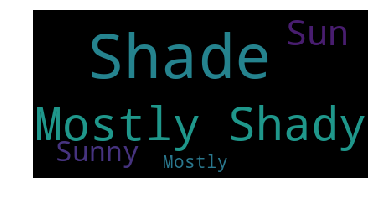

In [11]:
#WORDCLOUD - creating word cloud to visualize frequency of word used

wordcloud = WordCloud().generate(' '.join(xml_df['LIGHT']))
#wordcloud = WordCloud().generate(' '.join(xml_df['BOTANICAL']))

#wordcloud = WordCloud().generate(xml_token)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**--------------------------------- LABEL ENCODING & BINARY --------------------------------------**

reassigning column object to become category --> assign encoded value to different outputs in column

In [ ]:
#fixing 'PRICE'
xml_df['PRICE'] = xml_df['PRICE'].str.replace('$', '')   #remove "$" from "PRICE" to make into integar
xml_df['PRICE'] = xml_df['PRICE'].astype(float)          #converts 'PRICE' from obj to float


#LABEL ENCODING
xml_df['LIGHT']= xml_df['LIGHT'].astype('category')      #convert 'LIGHT' from obj to category
xml_df["LIGHT_LE"] = xml_df["LIGHT"].cat.codes              #label encoding


xml_df['ZONE']= xml_df['ZONE'].astype('category')      #convert 'LIGHT' from obj to category
xml_df["ZONE_LE"] = xml_df["ZONE"].cat.codes              #label encoding


#BINARY- creates binary where one type is 1 and everything else in row is 0
#http://pbpython.com/categorical-encoding.html
xml_df["ZONE_binary"] = np.where(xml_df["ZONE"].str.contains("Annual"), 1, 0)



display(HTML(xml_df.to_html()))

**--------------------------------- STATISTICAL TESTING --------------------------------------**


**There's always independent (eg gender) and dependent variable (eg test scores). If independent variable has more than one outcome, use ANOVA, otherwise use t-test. Testing done to determine to what degree of confidence the difference between means of 2 groups did not occur by chance.**

**T-TEST: used to determine if there's significant difference between the mean of 2 groups. infer that dependent variable fits normal distribution so we can always predict what the outcome is.** 
- **larger t score -> larger difference between both groups**
- **smaller p value -> less probability that results were by chance**

**ANOVA: similar to t-test but used if comparing means of more than 2 populations**


**PEARSON CORRELATION: gives strongest linear correlation between 2 groups, expressed in terms of r [-1,+1] where 0 means there's no correlation; can be either positively or negatively correlated**



In [ ]:
## Define 2 random distributions
#Sample Size
N = 36
#Gaussian distributed data with mean = 2 and var = 1
a = xml_df["LIGHT_LE"]
#Gaussian distributed data with with mean = 0 and var = 1
b = xml_df["ZONE_LE"]



## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
#Note that we multiply the p value by 2 because its a twp tail t-test
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(2*p2))

In [ ]:
#gives (Pearson's correlation coefficient, 2-tailed p-value)

#data = xml_df[['LIGHT','ZONE_binary']]

x = xml_df['LIGHT']
y = xml_df['ZONE_binary']
pearsonr(x, y)
#correlation = data.corr(method='pearson')

In [ ]:
cat1 = xml_df['LIGHT']
cat2 = xml_df['ZONE_binary']

ttest_ind(cat1, cat2)


In [ ]:
def plotData(inData,color):
    x,y = zip(*inData)

    xMap = assignIDs(x)
    xAsInts = np.array([xMap[i] for i in x])

    pearR = np.corrcoef(xAsInts,y)[1,0]
    # least squares from:
    # http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html
    A = np.vstack([xAsInts,np.ones(len(xAsInts))]).T
    m,c = np.linalg.lstsq(A,np.array(y))[0]

    plt.scatter(xAsInts,y,label='Data '+color,color=color)
    plt.plot(xAsInts,xAsInts*m+c,color=color,
             label="Fit %6s, r = %6.2e"%(color,pearR))
    plt.xticks(xMap.values(),xMap.keys())
    plt.legend(loc=3)
    plt.show()

In [ ]:
display(HTML(xml_df['PRICE','ZONE_binary'].to_html()))

In [ ]:
def correlation_matrix(xml_df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(xml_df)

In [ ]:
"""

pearson  correlation, fisher, spearman tests
anova test; shady is 1, everything else is 0


**--------------------------------- TROUBLESHOOTING --------------------------------------**

- **Original dataset (https://data.cityofnewyork.us/api/views/kku6-nxdu.xml) had multiple tables so code used wasn't able to read through it.** 
- **Parsing datafile:** 

NLTK: bag,token,freq,